# Imports

In [18]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import feather
import scipy.stats as stats

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Displaying Resolution
plt.rcParams['figure.dpi'] = 150
# Saveing Resolution
plt.rcParams['savefig.dpi'] = 300

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import sklearn. metrics
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn.metrics import accuracy_score
from sklearn. metrics import balanced_accuracy_score 
import sklearn. metrics
from sklearn import preprocessing 
from sklearn. model_selection import train_test_split 
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn. metrics import confusion_matrix 
#import graphviz

import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
images = []
labels = []
import imageio  as iio
import keras
# import sequential model
from keras.models import Sequential
# import core layers
from keras.layers import Dense, Dropout, Activation, Flatten
# import CNN layers
from keras.layers import Conv2D, MaxPooling2D
# import utilities
from keras.utils import np_utils
# import adam optimizer
from tensorflow.keras.optimizers import Adam


import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
# Check is using GPU for tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#Print tens
print(tf.__version__)
print(tf.test.is_built_with_cuda())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 464683256892178016
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7798259712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8481175693403931929
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:0d:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
Num GPUs Available:  1
2.8.0
True


In [48]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

dataset_path = 'Images/'

# Load and preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # MobileNetV2 standard input size
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Build the model
base_model = MobileNetV2(weights='imagenet', include_top=False)  # Load pre-trained MobileNetV2
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax') 
])


model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
# # Train the model
# history = model.fit(
#     train_generator,
#     epochs=10,
#     validation_data=validation_generator
# )

# # Save the model
# model.save('Classification Model/painting_classification_model.h5')

Found 5147 images belonging to 27 classes.
Found 1270 images belonging to 27 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_13 (Dense)            (None, 1024)              1311744   
                                                                 
 dense_14 (Dense)            (None, 27)                27675     
                                                                 
Total params: 3,597,403
Trainable params: 1,339,419
Non-trainable params: 2,257,984
________________

k:\Python\Anaconda\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('Classification Model/painting_classification_model.h5')


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Images/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for later mapping the predictions to labels

)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Predict the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)



Found 6417 images belonging to 27 classes.
201/201 [==============================] - 13s 61ms/step - loss: 0.8866 - accuracy: 0.7934
Test loss: 0.8866387009620667, Test accuracy: 0.7933613657951355


In [50]:
true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())
predicted_class_names = [class_labels[i] for i in predicted_classes]


# Classification report and confusion matrix
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print(confusion_matrix(true_classes, predicted_classes))

                            precision    recall  f1-score   support

    Abstract_Expressionism       0.90      0.84      0.87       213
           Action_painting       1.00      0.67      0.80         6
         Analytical_Cubism       1.00      0.89      0.94         9
        Art_Nouveau_Modern       0.83      0.75      0.79       347
                   Baroque       0.63      0.89      0.74       358
      Color_Field_Painting       0.96      0.88      0.92       127
      Contemporary_Realism       0.94      0.71      0.81        45
                    Cubism       0.87      0.83      0.85       189
         Early_Renaissance       0.85      0.80      0.83       116
             Expressionism       0.75      0.81      0.78       539
                   Fauvism       0.93      0.67      0.78        84
          High_Renaissance       0.91      0.65      0.76        94
             Impressionism       0.75      0.92      0.83      1054
Mannerism_Late_Renaissance       0.88      0.69

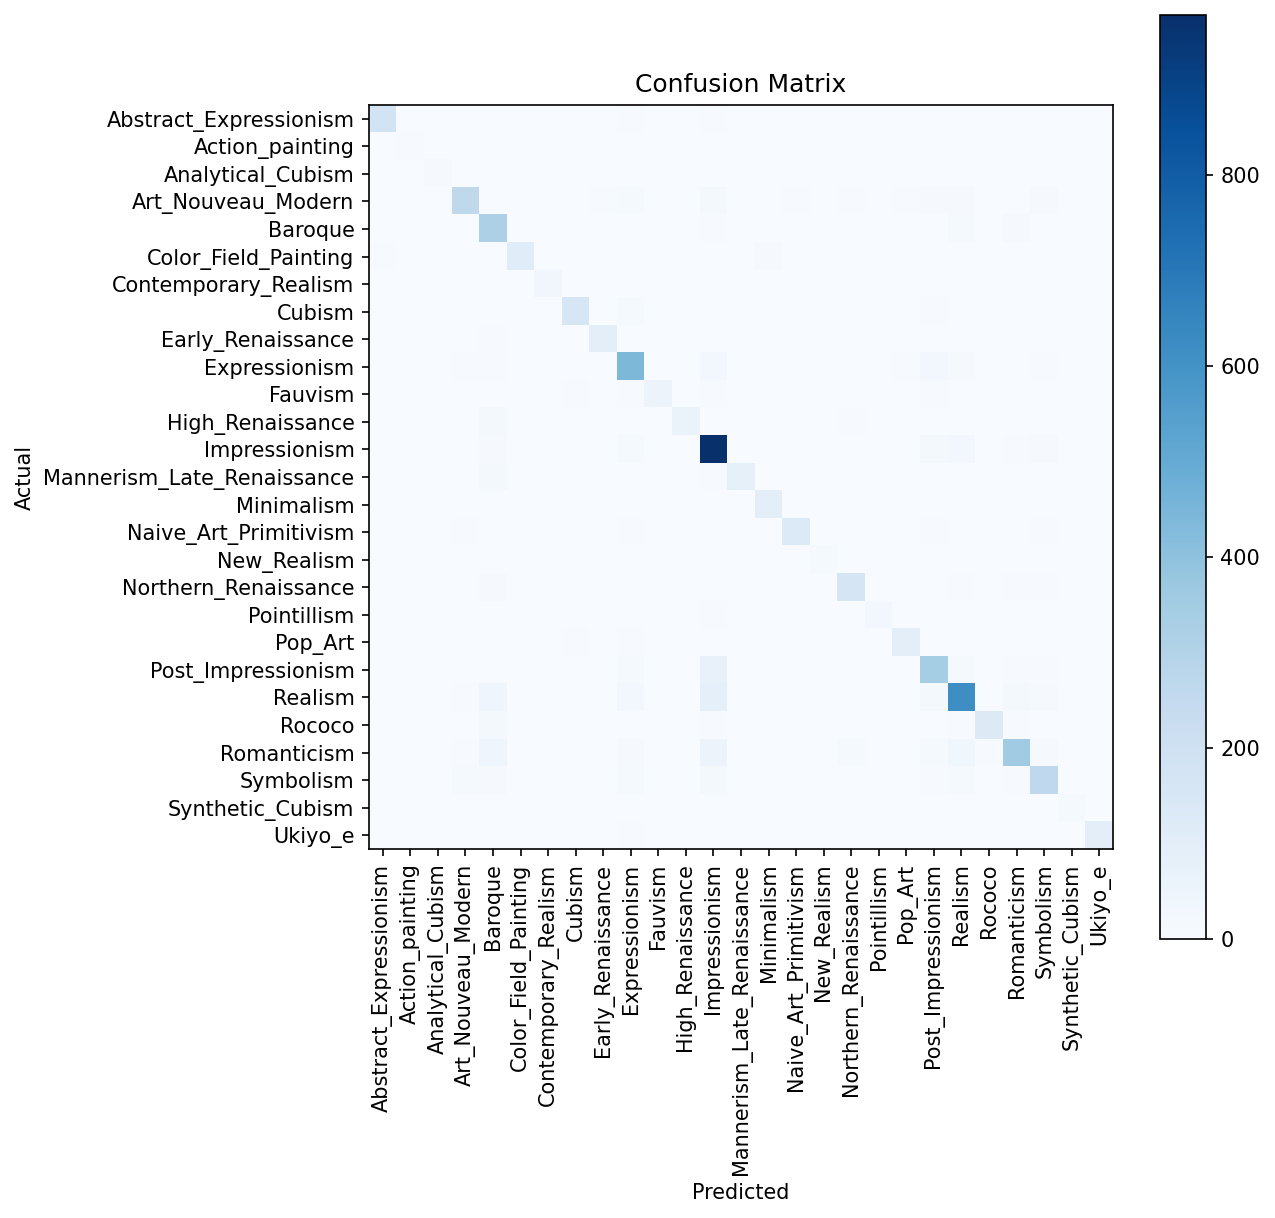

In [51]:
# plot the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)
plt.show()


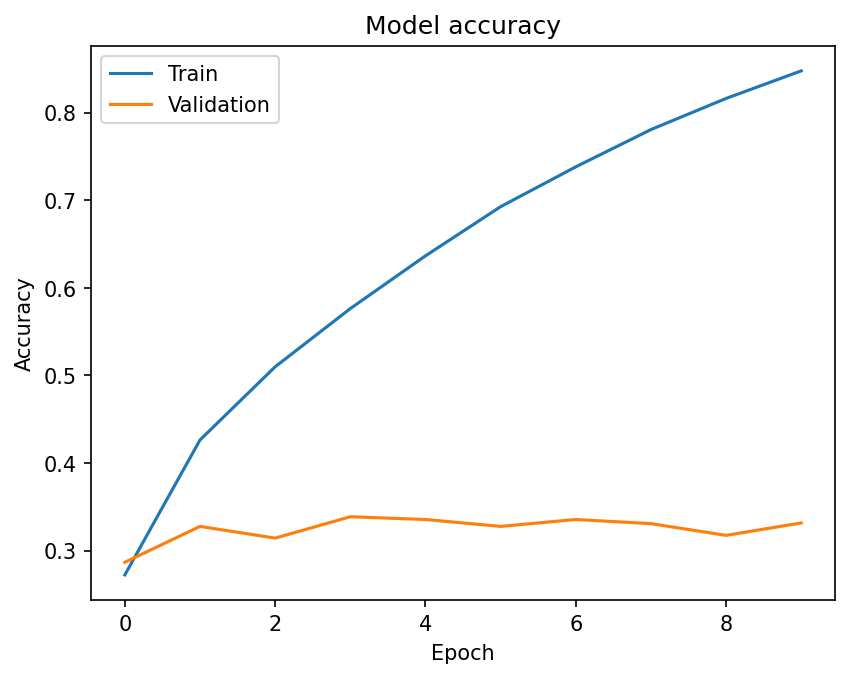

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Class: Abstract_Expressionism, Number of Images: 213
Class: Action_painting, Number of Images: 6
Class: Analytical_Cubism, Number of Images: 9
Class: Art_Nouveau_Modern, Number of Images: 347
Class: Baroque, Number of Images: 358
Class: Color_Field_Painting, Number of Images: 127
Class: Contemporary_Realism, Number of Images: 45
Class: Cubism, Number of Images: 189
Class: Early_Renaissance, Number of Images: 116
Class: Expressionism, Number of Images: 539
Class: Fauvism, Number of Images: 84
Class: High_Renaissance, Number of Images: 94
Class: Impressionism, Number of Images: 1054
Class: Mannerism_Late_Renaissance, Number of Images: 117
Class: Minimalism, Number of Images: 101
Class: Naive_Art_Primitivism, Number of Images: 174
Class: New_Realism, Number of Images: 21
Class: Northern_Renaissance, Number of Images: 197
Class: Pointillism, Number of Images: 39
Class: Pop_Art, Number of Images: 112
Class: Post_Impressionism, Number of Images: 469
Class: Realism, Number of Images: 827
Clas

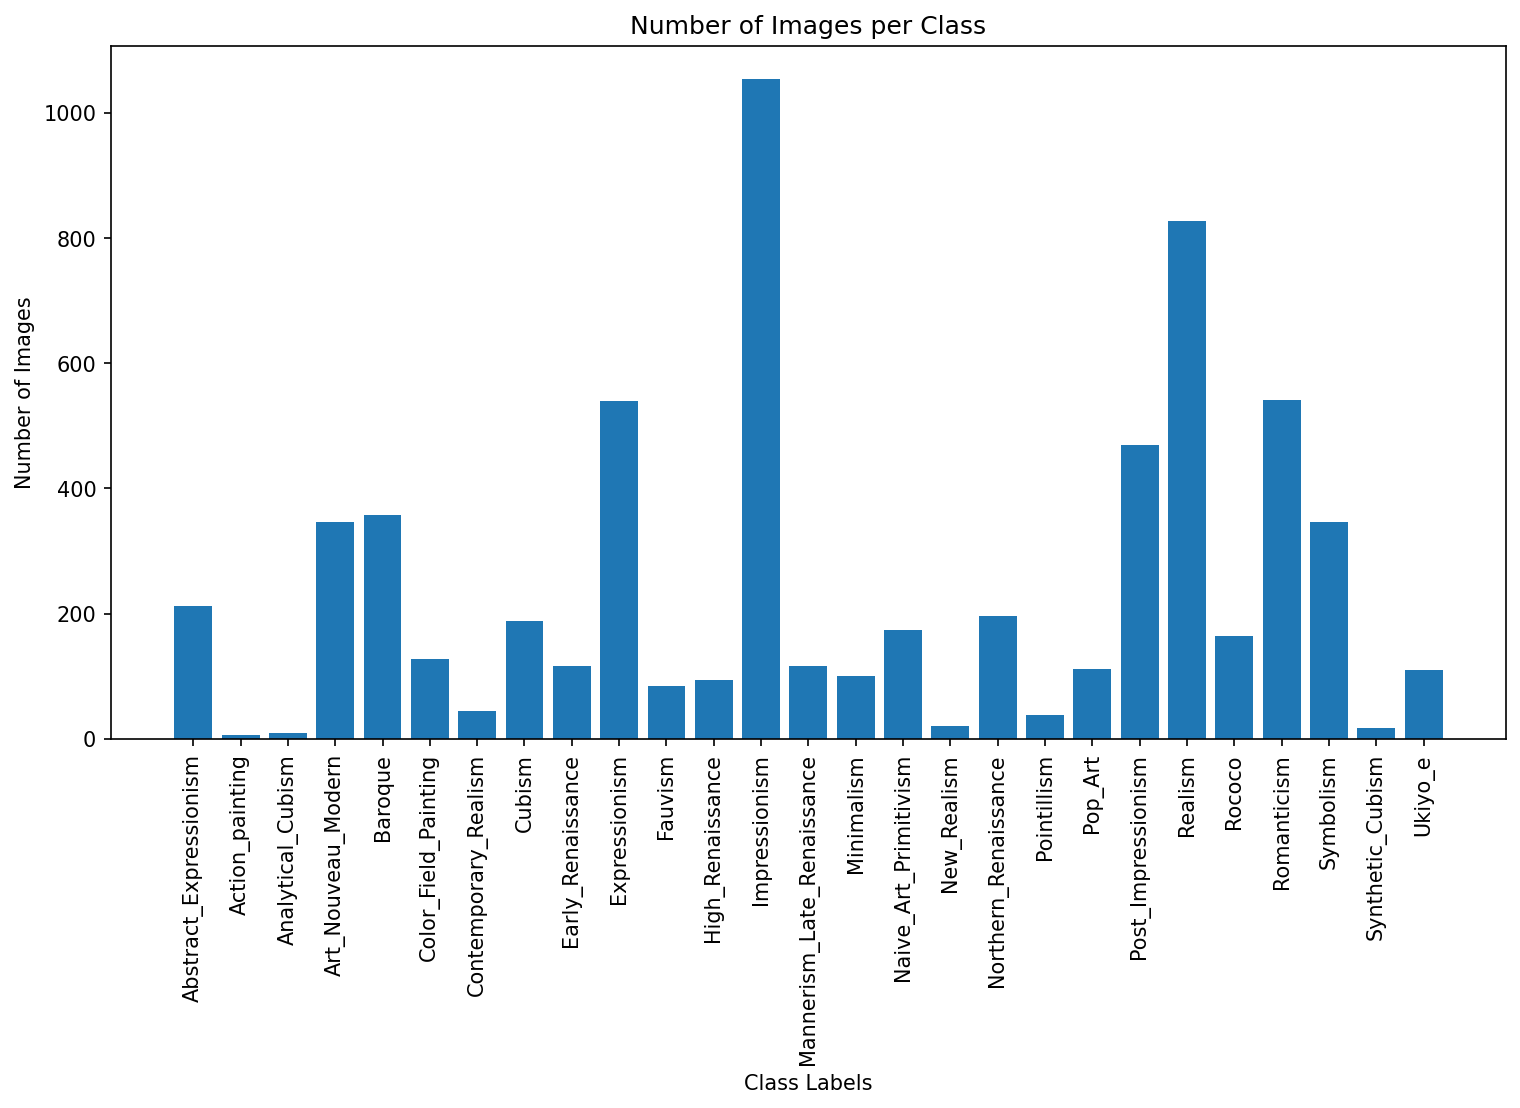

In [53]:
import os

folder_path = 'Images/'

class_folders = os.listdir(folder_path)

for class_folder in class_folders:
    class_path = os.path.join(folder_path, class_folder)
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_folder}, Number of Images: {num_images}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(class_folders, [len(os.listdir(os.path.join(folder_path, class_folder))) for class_folder in class_folders])
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=90)
plt.show()
    

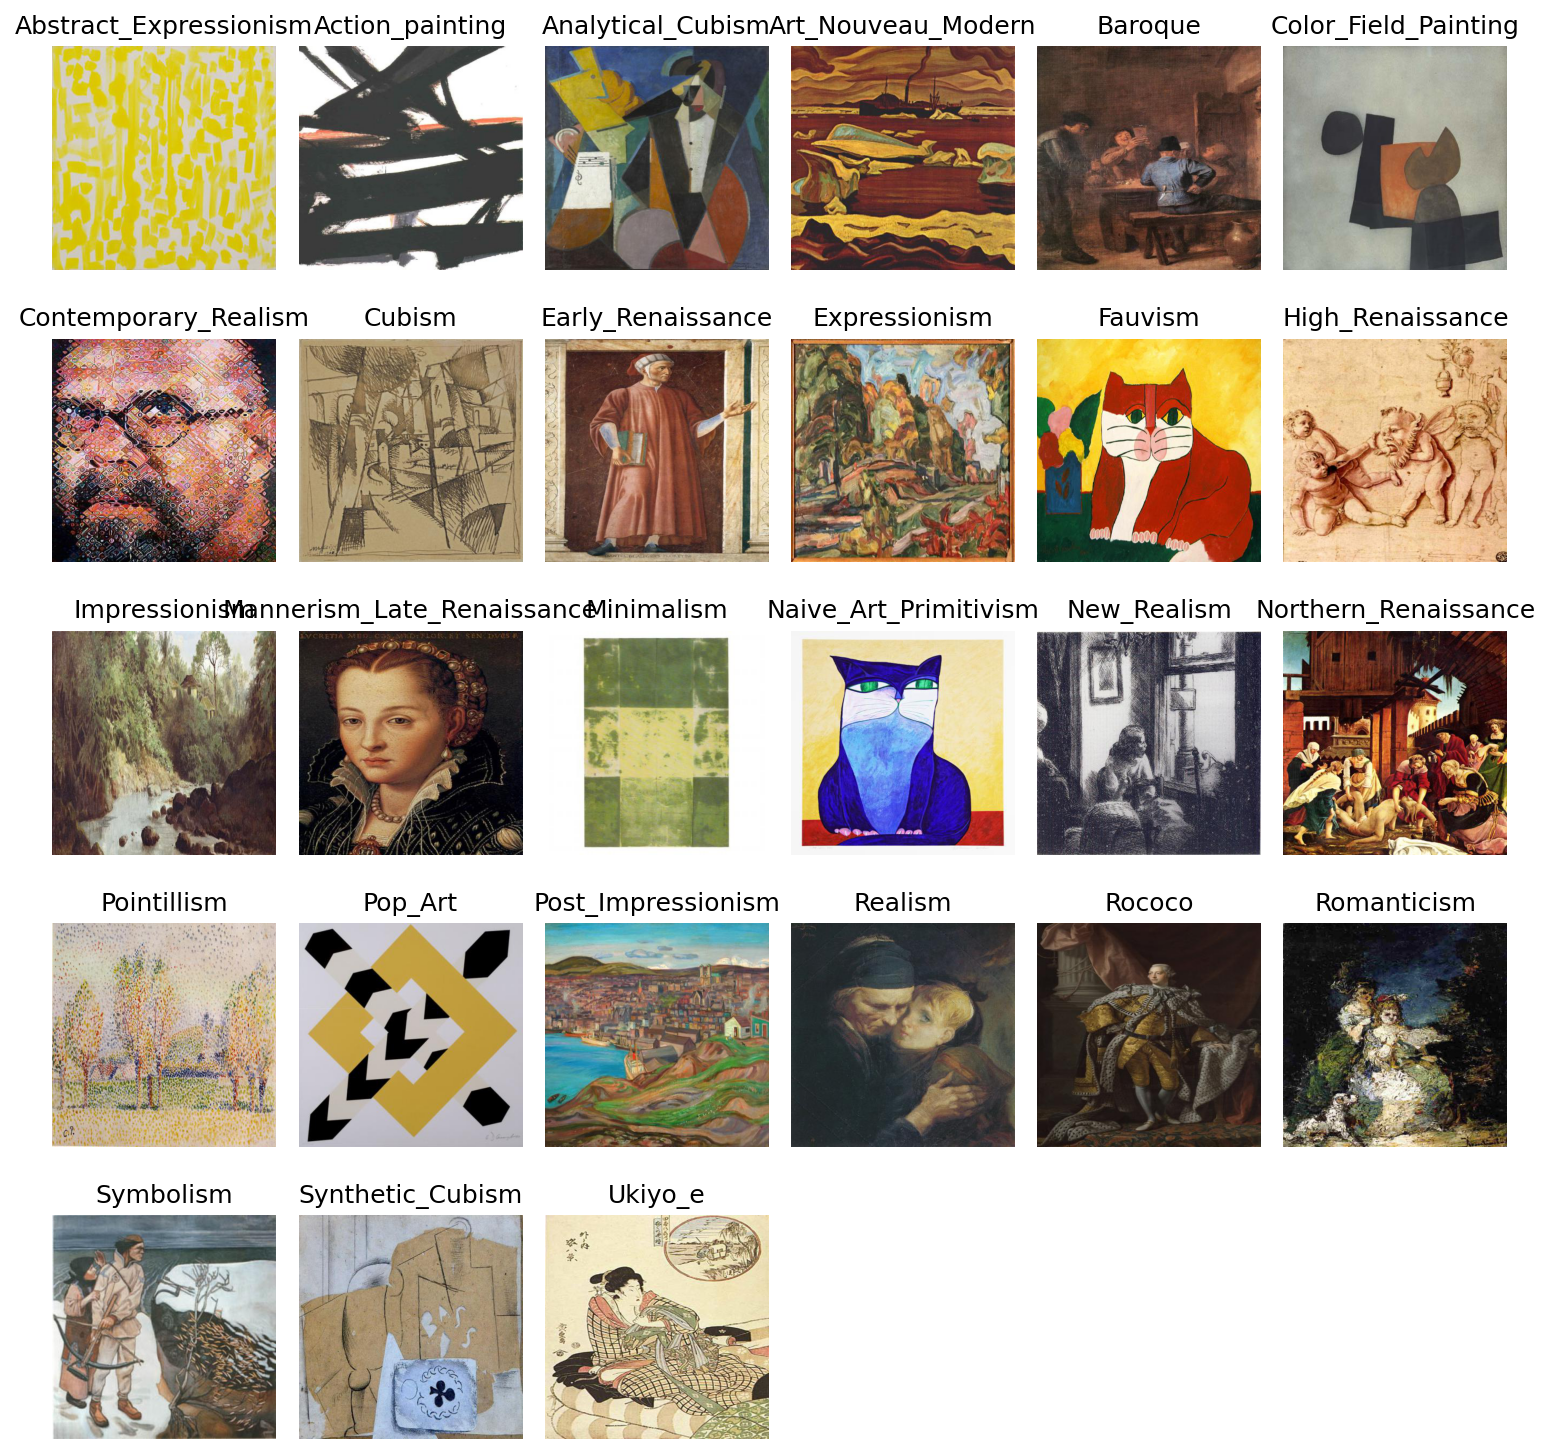

In [54]:
import matplotlib.pyplot as plt
import os

# Define the path to the folder containing the images
folder_path = 'Images'

# Get the list of class folders
class_folders = os.listdir(folder_path)

# Create a figure to display the images
fig = plt.figure(figsize=(10, 10))

# Loop through each class folder
for i, class_folder in enumerate(class_folders):
    # Get the list of image files in the class folder
    image_files = os.listdir(os.path.join(folder_path, class_folder))
    
    # Load and display the first image from the class folder
    image_path = os.path.join(folder_path, class_folder, image_files[1])
    image = plt.imread(image_path)
    
    # Add the image to the figure
    ax = fig.add_subplot(5, 6, i+1)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(class_folder)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [55]:
def load_img():
    global img, image_display
    file_path = filedialog.askopenfilename()
    img = Image.open(file_path)
    img = img.resize((224, 224))  # Resize the image to match the model's expected input
    image_display = ImageTk.PhotoImage(img)
    label.configure(image=image_display)
    label.image = image_display

def classify_img():
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)  # Rescale and add batch dimension
    preds = model.predict(img_array)
    predicted_class = np.argmax(preds, axis=1)
    class_labels = list(train_generator.class_indices.keys())  # Make sure this is accessible
    result_label.configure(text="Predicted Class: " + class_labels[predicted_class[0]])

# Set up GUI
root = tk.Tk()
root.title("Painting Type Classifier")
root.geometry("500x500")

btn_load = tk.Button(root, text="Load Image", command=load_img)
btn_load.pack()

btn_classify = tk.Button(root, text="Classify Image", command=classify_img)
btn_classify.pack()

label = tk.Label(root)
label.pack()

result_label = tk.Label(root, text="", font=('Arial', 14))
result_label.pack()

root.mainloop()